# Exam example
The solution should include the following sections

- Data analysis, description and understanding, data visualization 
- Data prepariation and cleaning (some datasets contains null values, text values or skewed values)
- Selection of suitable input data and possible modification (standardization, PCA, ...)
- Creating a model using classical methods, model validation and evaluation of model accuracy (you should be able to explain the method used theoretically)
- Creating another model using neural networks, model validation and evaluation of model accuracy
- Comparison of both models
- Inteference

# 1. Data analysis, description, visualization and understanding

## The Boston Housing Dataset

The housing dataset is derived from housing information for the Boston, Massachusetts area collected by the U.S. Census Bureau. 

The data was originally published in an article by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. 

The dataset contains information on 506 different houses in Boston.

Dataset features
* CRIM - crime rate per capita by city
* ZN - the proportion of land for housing with an area of more than 25 000 m2.
* INDUS - share of non-commercial business space per city
* CHAS - Charles River dummy variable (1 if the tract borders a river; 0 otherwise)
* NOX - nitrogen oxide concentration (parts per 10 million)
* RM - average number of rooms per apartment
* AGE - share of owner-occupied dwellings built before 1940
* DIS - weighted distances to Boston's five employment centers
* RAD - accessibility index to radial motorways
* TAX - Full value property tax rate at 10,000 dollars
* PTRATIO - pupil-teacher ratio by town
* B - 1000 (Bk - 0,63) ^ 2, where Bk is the proportion of blacks in each city.
* LSTAT - Percentage of lower population
* MEDV - Median value of owner-occupied dwellings in $ 1000

## 1.1 Reading data from a CSV file

In [1]:
import pandas as pd
data = pd.read_csv ("dataset\HousingData.csv")

In [2]:
# file structure information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 1.2 Basic data characteristics

In [3]:
# the first 10 lines
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Basic statistics of the data in columns 
- number of records
- mean - average
- variance
- minimum
- 25% percentile
- 50% percentile
- median
- 75% percentile
- maximum

* __Columns CRIM, ZN have mean and median are significantly different__
* __Column RM has  the mean and median are similar__

## 1.3 Distribution of values
Visualizing the distribution of data in columns could reveal skewed, abnormal values.

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

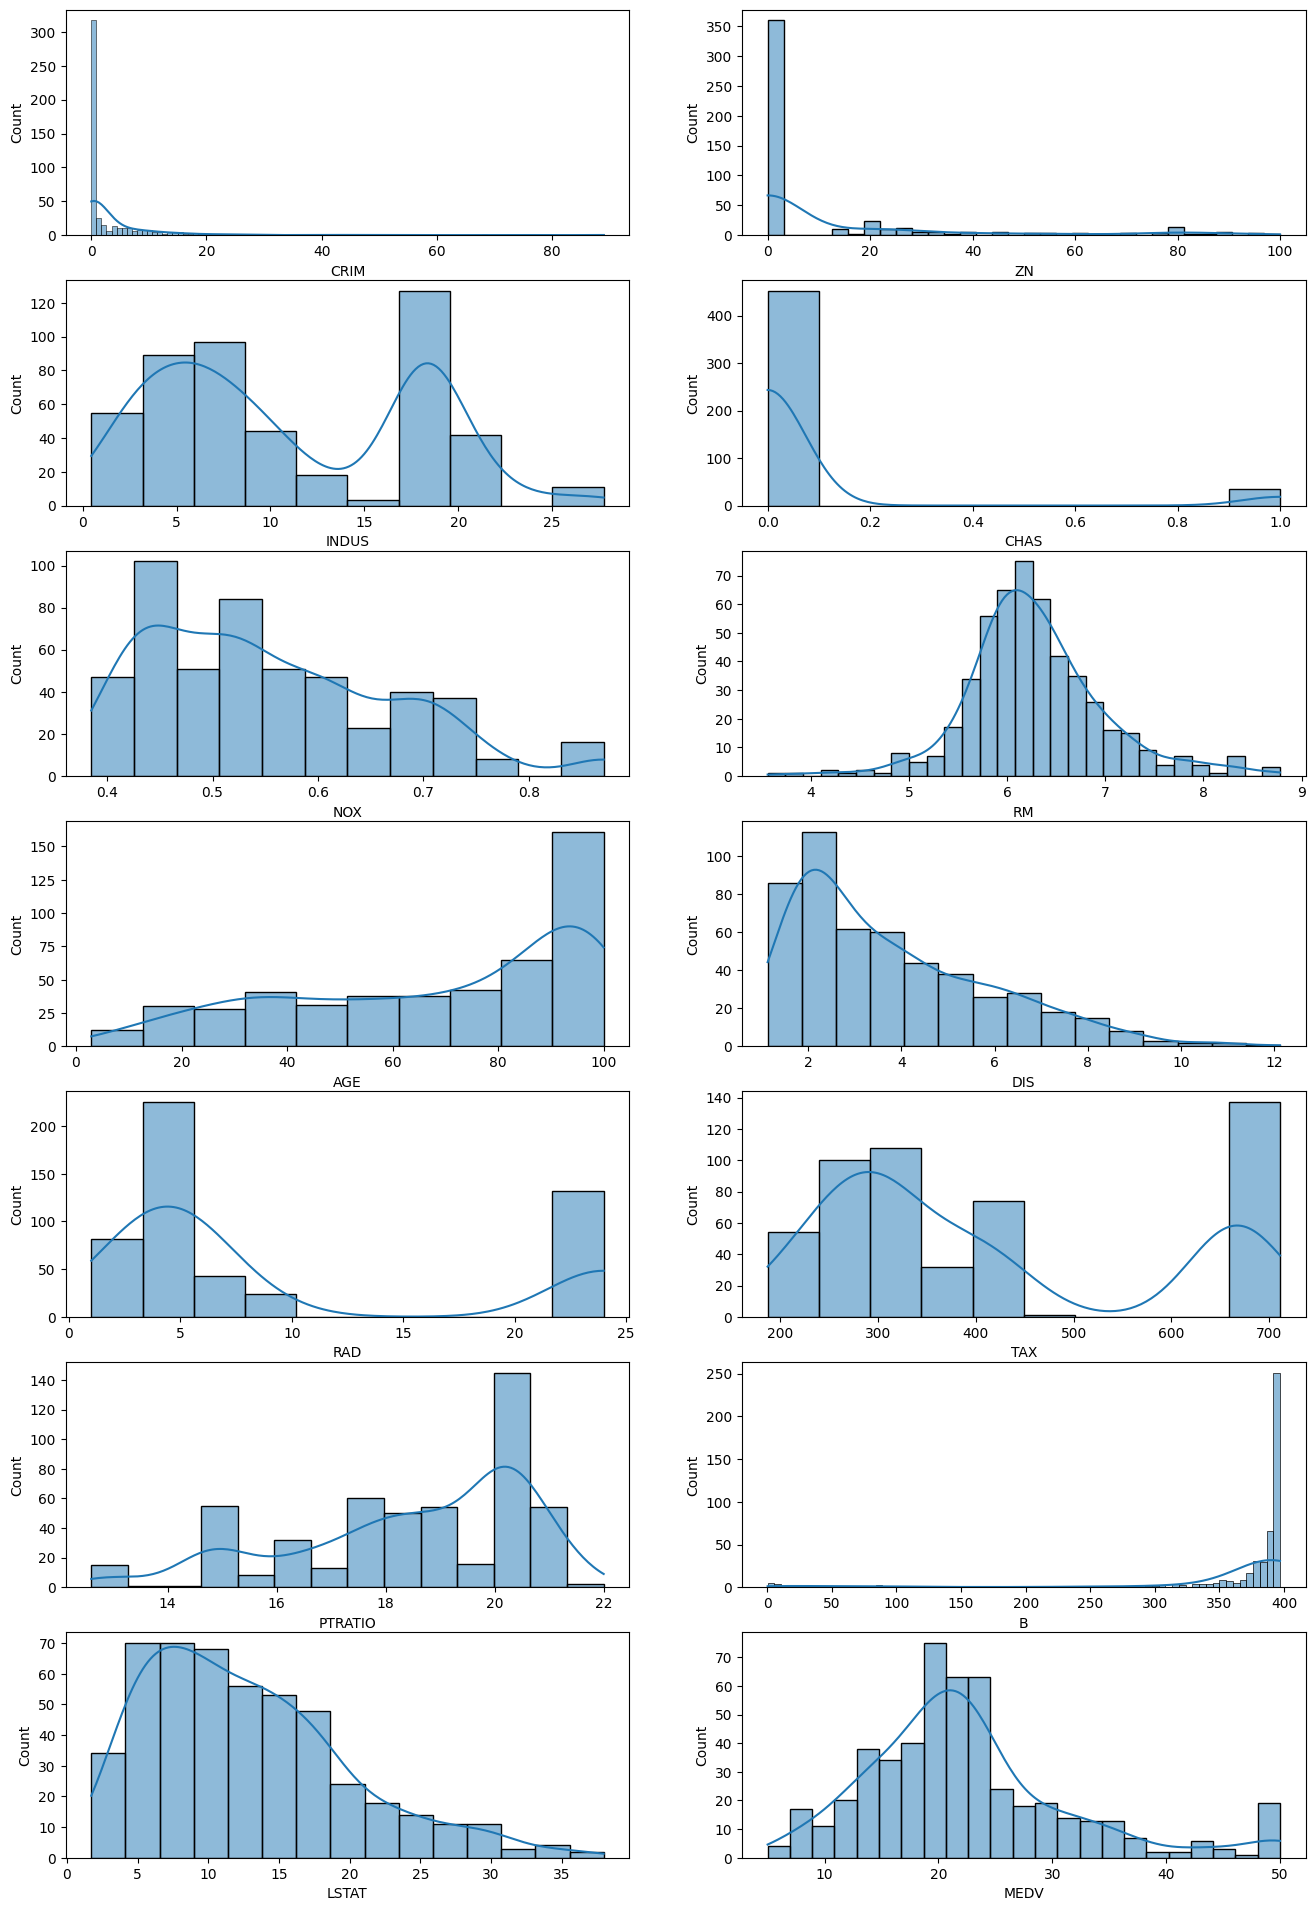

In [6]:
pos = 1
fig = plt.figure(figsize=(16,24))
for i in data.columns:
    ax = fig.add_subplot(7,2, pos)
    pos = pos + 1
    sns.histplot(data[i], ax=ax, kde=True)

* CRIM most records have very small values
* ZN most records have very small values
* INDUS contains two peaks around the values 7 and 18
* CHAS most records have low values, but some have the highest value.
* NOX almost uniform distribution, but gradually decreases towards the maximum
* RM has a normal split
* AGE almost even distribution for younger buildings, but many buildings are very old
* DIS The median is at 2, the number of values decreases as the value increases
...
* MEDV has almost normal distribution, only very high values are more, we remove the outliers at 40

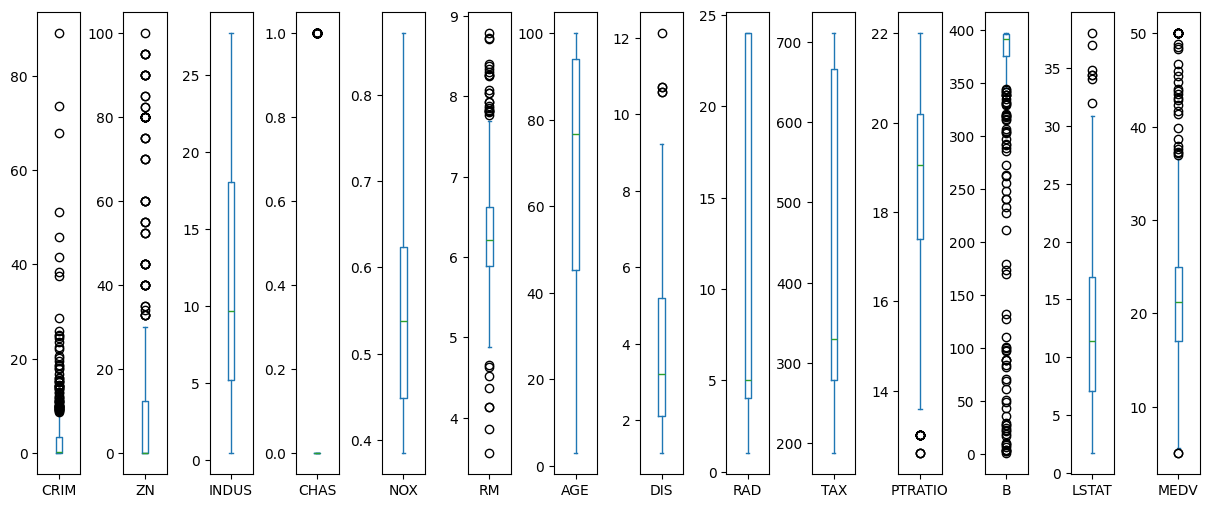

In [7]:
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()

## 1.4 Relationships between variables
Creating graphs for all combinations of the two functions could show us the type of dependency.

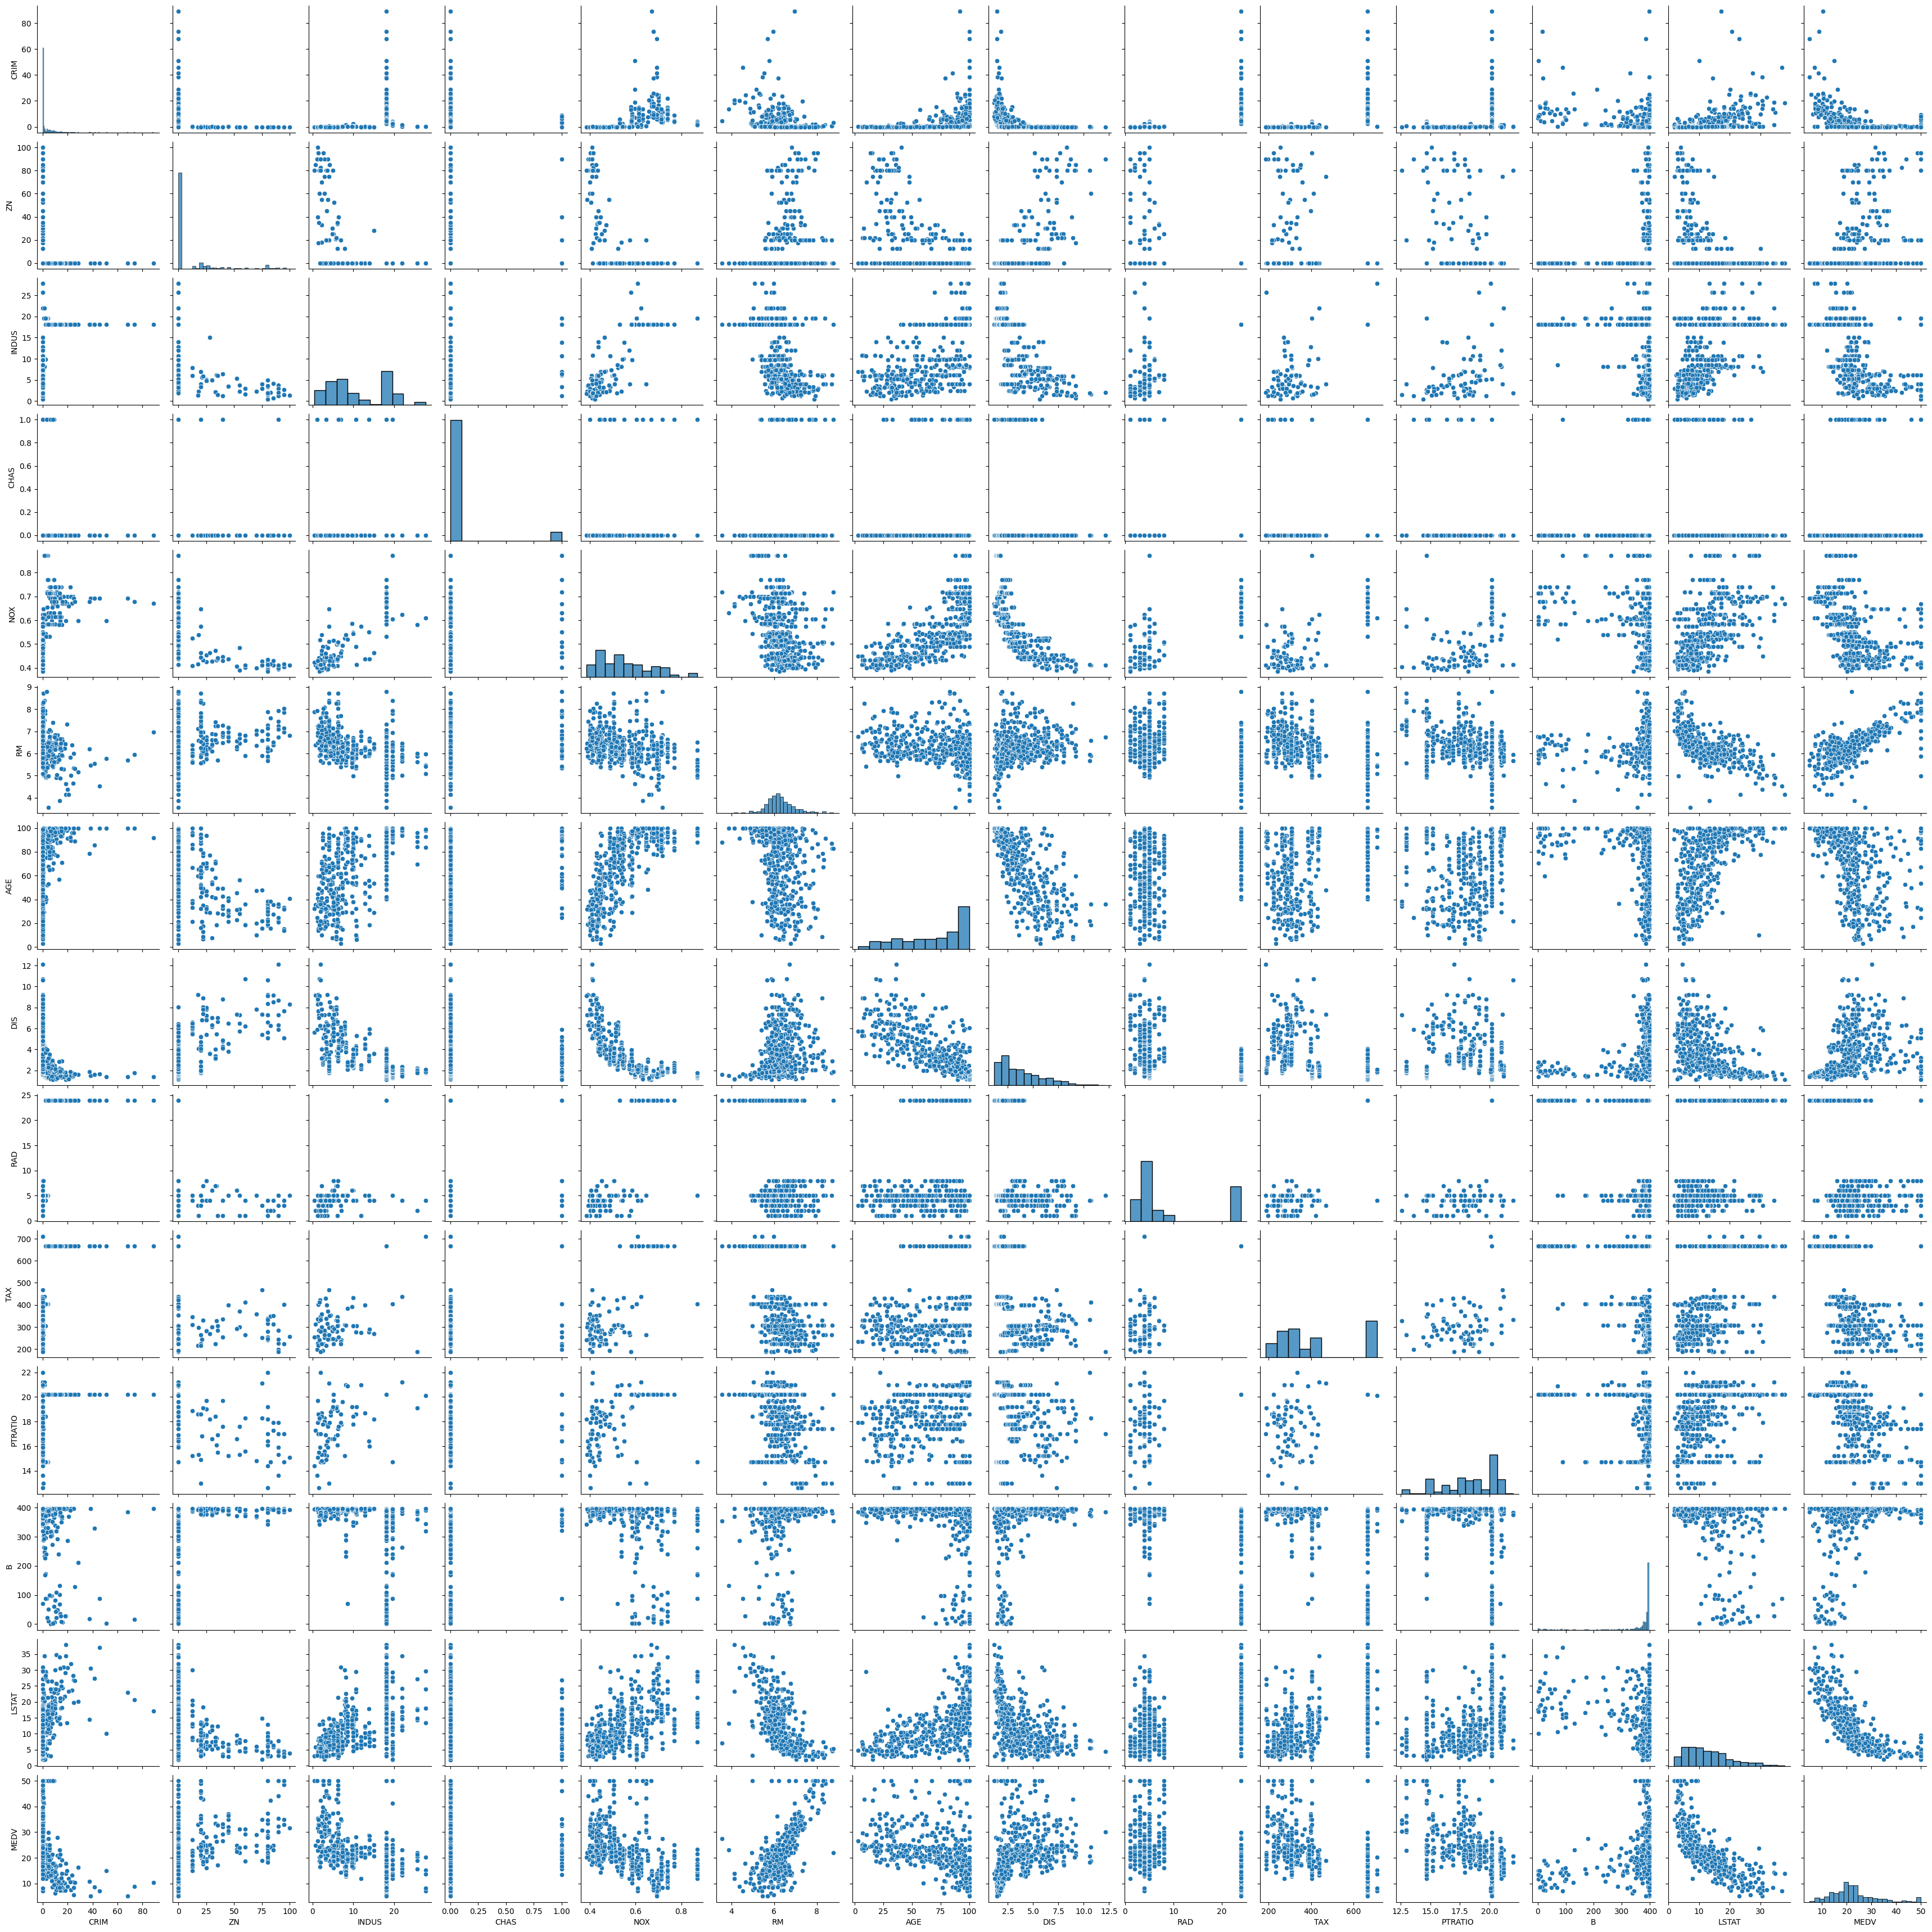

In [8]:
sns.pairplot(data)

The graphs show that there is some linear relation between RM, LSTAT and MEDV. 
* RM - average number of bedrooms per dwelling (input variable)
* LSTAT - percentage of lower status population (input variable)
* MDEV - median value of owner-occupied dwellings in $1,000 (output variable)

The relationships between variables were estimated by eye. But it can also be done exactically using correlation.

In [9]:
corr=data.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


A strong direct or indirect correlation may indicate a relationship between input parameters. This can help us in choosing the input parameters of the model.

Sometimes it can be useful to show correlations using a temperature map. Especially if the correlation matrix is large, the colours can help us to orient ourselves.

<Axes: >

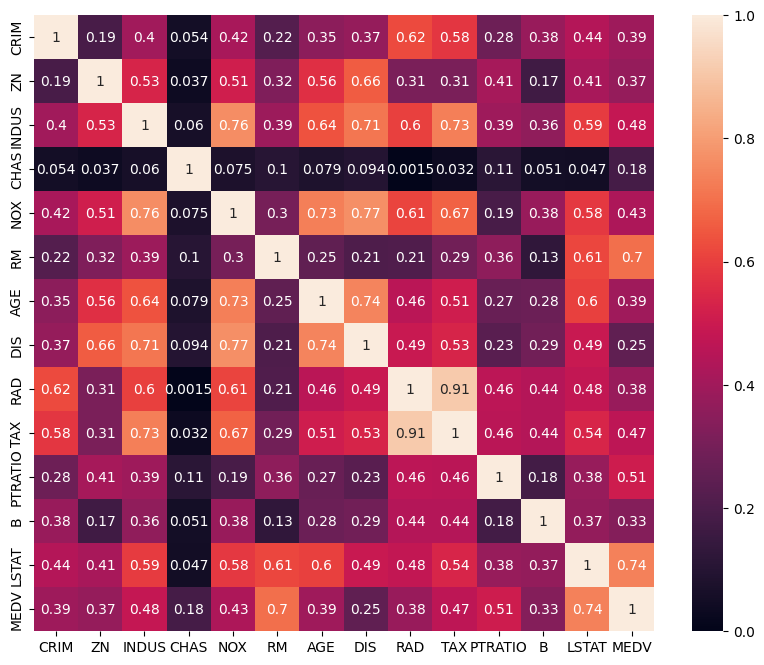

In [10]:
plt.figure(figsize = (10,8))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

For example, the CHAS column (Charles River dummy variable) has no relationship to other elements. 

In contrast, __the columns LSTAT, TAX, RAD, NOX, INDUS have relationships to other columns__.

Target column MEDV has strong correlation with RM and LSTAT. These columns we will use in linear model.

## 1.5 Data vizualization

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [12]:
MEDV = data['MEDV']
RM = data['RM']
LSTAT = data['LSTAT']

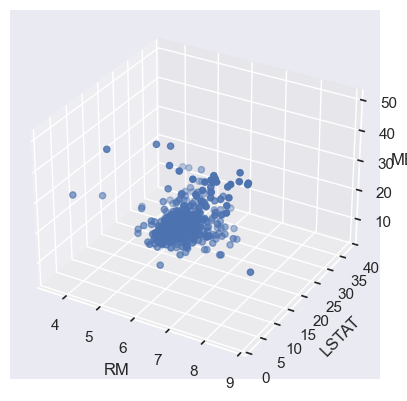

In [13]:
sns.set_theme(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("RM")
ax.set_ylabel("LSTAT")
ax.set_zlabel("MEDV")
ax.scatter(RM, LSTAT, MEDV)
plt.show()

In [14]:
plt.close()

# 2 Data preparation and standardisation

## 2.1 Data cleaning

Some columns contain NULL data. We will drop them.

In [15]:
print (data.isnull().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [16]:
data=data.dropna()

Sometimes it is useful to discard data with outliers. 
We remove rows from the dataset where the median house value is greater than 40.

In [17]:
data = data[~(data['MEDV'] >= 40.0)]

# 3 Data standardization 

In [18]:
from sklearn.preprocessing import StandardScaler
import numpy as np

For linear model we will use input variables RM, LSTAT and output variable MEDV.

In [19]:
X_lin = pd.DataFrame(np.c_[data['RM'],data['LSTAT']], columns = ['RM', 'LSTAT']).to_numpy()
Y = data['MEDV']
Y = Y.to_numpy()

In [20]:
sc = StandardScaler()
X_lin_std = sc.fit_transform(X_lin)

In [21]:
import joblib
joblib.dump(sc, 'std_scaler_linear.bin', compress=True)

['std_scaler_linear.bin']

## 3.1 Data split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train now accounts for 75% of the entire data set
X_train_lin, X_test_lin, Y_train_lin, Y_test_lin = train_test_split(X_lin, Y, test_size=1 - train_ratio)

# the test is now 10% of the original data set
# validation is now 15% of the original data set
X_val_lin, X_test_lin, Y_val_lin, Y_test_lin = train_test_split(X_test_lin, Y_test_lin, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train_lin.shape)
print (X_val_lin.shape)
print (X_test_lin.shape)

(278, 2)
(55, 2)
(38, 2)


# 4 Linear model

## 4.1 Training

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_model = LinearRegression()
lin_model.fit(X_train_lin, Y_train_lin)

LinearRegression()

In [26]:
print ("Bias: ", lin_model.intercept_)
print("Weight: ", lin_model.coef_)

Bias:  14.290461595098826
Weight:  [ 2.34194584 -0.59773624]


## 4.2 Validation

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
Y_predicted = lin_model.predict(X_val_lin)

In [29]:
def print_model_score(Y_train, y_train_predict):
    r2 = r2_score(Y_train, y_train_predict)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))    
    print('R2 score: {}'.format(r2))    
    print('RMSE: {}'.format(rmse))

In [30]:
print_model_score (Y_val_lin, Y_predicted)

R2 score: 0.5988952683780999
RMSE: 5.192222632224115


## 4.3 Save model

In [31]:
import pickle
filename = 'regression_linear_model.sav'
pickle.dump(lin_model, open(filename, 'wb'))

# 5. Neural network

In [32]:
import keras
from keras.layers import Dense, Activation, Input
from keras.models import Sequential

For ANN we will use all 13 input variables

In [33]:
X_ann = data.iloc[:, 0:13]
Y = data['MEDV']

In [34]:
sc_ann = StandardScaler()
X_ann_std = sc_ann.fit_transform(X_ann)
joblib.dump(sc_ann, 'std_scaler_ann.bin', compress=True)

['std_scaler_ann.bin']

In [35]:
train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10
X_train_ann, X_test_ann, Y_train_ann, Y_test_ann = train_test_split(X_ann_std, Y, test_size=1 - train_ratio)
X_val_ann, X_test_ann, Y_val_ann, Y_test_ann = train_test_split(X_test_ann, Y_test_ann, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train_ann.shape)
print (X_val_ann.shape)
print (X_test_ann.shape)

(278, 13)
(55, 13)
(38, 13)


## 5.1 Structure

In [36]:
model = Sequential()
model.add(Input(shape=(13,))) 
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation  = 'relu'))
model.add(Dense(32, activation  = 'relu'))
model.add(Dense(16, activation  = 'linear'))
model.add(Dense(1))

In [37]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
from keras_visualizer import visualizer 
visualizer(model, file_format='png', view=True)

## 5.2 Learning

In [40]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)
history=model.fit(X_train_ann, Y_train_ann, epochs = 100, batch_size=5, validation_data=(X_val_ann, Y_val_ann), callbacks=[early_stop])

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 370.5070 - mae: 17.8470 - val_loss: 26.7251 - val_mae: 4.2239
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.4564 - mae: 4.2576 - val_loss: 9.7635 - val_mae: 2.4158
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.3498 - mae: 2.7797 - val_loss: 7.7046 - val_mae: 2.2842
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9767 - mae: 2.3554 - val_loss: 7.8347 - val_mae: 2.2876
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4916 - mae: 2.4604 - val_loss: 6.3511 - val_mae: 1.9297
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.1067 - mae: 2.0697 - val_loss: 6.7334 - val_mae: 1.9630
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6315 - mae: 2.1071 - val_loss: 7.0231 - val_mae: 2.0031
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.7410 - mae: 1.8509 - val_loss: 6.6721 - val_mae: 1.9511
Epoch 9/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

## 5.3 Validation

In [41]:
Y_pred = model.predict(X_val_ann)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [42]:
print_model_score(Y_val_ann, Y_pred)

R2 score: 0.887962326510827
RMSE: 2.614760725878033


## 5.4 History of learning

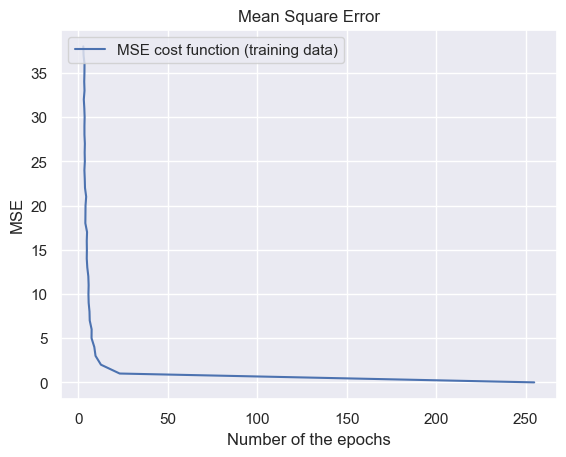

In [43]:
fig = plt.figure()
plt.plot(history.history['loss'], range (len(history.history['loss'])), label='MSE cost function (training data)')
plt.title('Mean Square Error')
plt.ylabel('MSE')
plt.xlabel('Number of the epochs')
plt.legend(loc="upper left")
plt.show()

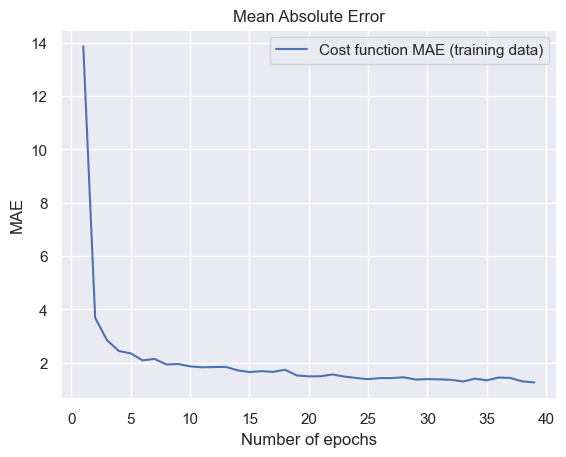

In [44]:
fig = plt.figure()
plt.title('Mean Absolute Error')
plt.xlabel('Number of epochs')
plt.ylabel('MAE')
plt.plot(range(1, len(history.history['mae']) + 1), history.history['mae'])
plt.legend(['Cost function MAE (training data)'])
plt.show()

In [45]:
model.save('regresion_model.keras')

# 6. Model compare

In [46]:
Y_lin_predicted = lin_model.predict(X_test_lin)

In [47]:
print_model_score(Y_test_lin, Y_lin_predicted)

R2 score: 0.7216113406995162
RMSE: 3.645661418878334


In [48]:
Y_ann_predicted = model.predict(X_test_ann)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [49]:
print_model_score(Y_test_ann, Y_ann_predicted)

R2 score: 0.8421932690110885
RMSE: 2.4649946160277083


__Neural network Model is more accurate, because its R2 score is highar than R2 score of linear model.__

# 7 Inference model
Using trained model in program.

Input values are [0.00632, 18, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 396.9, 4.98]
Output values is 24.

## 7.1 Linear model

In [50]:
import pickle
filename = 'regression_linear_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [51]:
import joblib
sc=joblib.load('std_scaler_linear.bin')

In [52]:
x=[[6.575, 4.98]]

In [53]:
X = sc.transform(x)

In [54]:
Y_predicted = loaded_model.predict(X)
print (f"The estimated price of the property is {Y_predicted[0]}")

The estimated price of the property is 16.509960457476122


## 7.2 ANN

In [55]:
import joblib
sc_ann=joblib.load('std_scaler_ann.bin')

In [56]:
model = keras.models.load_model('regresion_model.keras')

In [57]:
data = np.array([0.00632, 18, 2.31, 0, 0.538, 6.575, 65.2, 4.09, 1, 296, 15.3, 396.9, 4.98])
data = data.reshape(1, -1)

In [58]:
sdata = sc_ann.transform(data)

d:\Data\mapo3802\Devel\AI\UPCE_AI\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
Y_pred = model.predict(sdata)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [60]:
print (f"The estimated MEDV is {Y_pred[0][0]}")

The estimated MEDV is 24.43726348876953
